In [4]:
from google.colab import files

# Upload both train and validation files
uploaded = files.upload()


Saving train-data.tsv to train-data.tsv


In [5]:
from google.colab import files

# Upload both train and validation files
uploaded = files.upload()


Saving valid-data.tsv to valid-data.tsv


In [9]:
import pandas as pd

train_df = pd.read_csv("train-data.tsv", sep="\t")
valid_df = pd.read_csv("valid-data.tsv", sep="\t")

train_df.head()

,ham,"ahhhh...just woken up!had a bad dream about u tho,so i dont like u right now :) i didnt know anything about comedy night but i guess im up for it."
0,ham,you can never do nothing
1,ham,"now u sound like manky scouse boy steve,like! ..."
2,ham,mum say we wan to go then go... then she can s...
3,ham,never y lei... i v lazy... got wat? dat day ü ...
4,ham,in xam hall boy asked girl tell me the startin...


In [10]:
# Rename columns if needed
train_df.columns = ['label', 'message']
valid_df.columns = ['label', 'message']

# Convert labels to binary
label_map = {'ham': 0, 'spam': 1}
train_df['label'] = train_df['label'].map(label_map)
valid_df['label'] = valid_df['label'].map(label_map)


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['message'])

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(train_df['message'])
X_valid_seq = tokenizer.texts_to_sequences(valid_df['message'])

# Pad sequences
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_valid_pad = pad_sequences(X_valid_seq, maxlen=max_len, padding='post')

# Labels
y_train = train_df['label'].values
y_valid = valid_df['label'].values


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=max_len),
    GlobalAveragePooling1D(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_valid_pad, y_valid)
)


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8709 - loss: 0.4057 - val_accuracy: 0.8656 - val_loss: 0.3639
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8614 - loss: 0.3675 - val_accuracy: 0.8656 - val_loss: 0.3473
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8660 - loss: 0.3492 - val_accuracy: 0.8656 - val_loss: 0.3182
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8624 - loss: 0.3161 - val_accuracy: 0.8677 - val_loss: 0.2516
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8871 - loss: 0.2299 - val_accuracy: 0.9526 - val_loss: 0.1478
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9629 - loss: 0.1251 - val_accuracy: 0.9741 - val_loss: 0.1020
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9760 - loss: 0.0910 - val_accuracy: 0.9763 - val_loss: 0.0748
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9810 - loss: 0.0681 - val_accuracy: 0.

In [14]:
# Evaluate model
loss, acc = model.evaluate(X_valid_pad, y_valid)
print(f"Validation Accuracy: {acc:.4f}")

# Predict a new message
def classify_sms(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    prob = model.predict(pad)[0][0]
    return "Spam" if prob > 0.5 else "Ham"

print(classify_sms("Congratulations! You’ve won a free iPhone. Click here!"))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9795 - loss: 0.0572
Validation Accuracy: 0.9784
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Ham


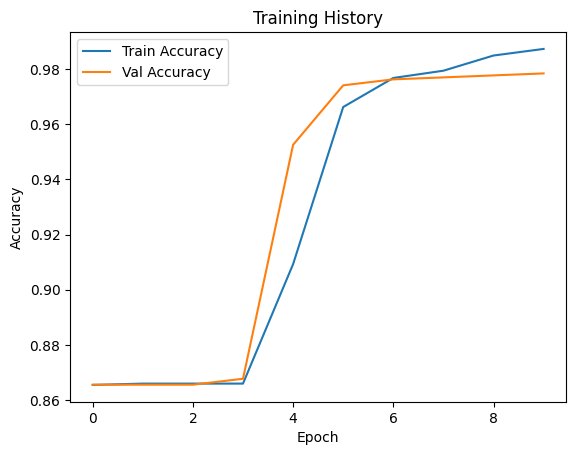

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
# Save the trained model
model.save("sms_text_classifier.h5")


In [17]:
import pickle

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [19]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.6 MB/s eta 0:00:00


In [20]:
# app.py
import streamlit as st
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load model and tokenizer
model = load_model("sms_text_classifier.h5")
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

max_len = 100  # should match what was used during training

# Streamlit UI
st.title("📱 SMS Spam Classifier")
st.write("Enter your SMS message below:")

message = st.text_area("Message Text", height=150)

if st.button("Predict"):
    if not message.strip():
        st.warning("Please enter a message.")
    else:
        seq = tokenizer.texts_to_sequences([message])
        padded = pad_sequences(seq, maxlen=max_len, padding='post')
        pred = model.predict(padded)[0][0]
        label = "Spam 🚫" if pred > 0.5 else "Ham ✅"
        st.success(f"Prediction: **{label}**")


2025-07-19 17:13:55.797 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 17:13:56.143 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-19 17:13:56.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 17:13:56.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 17:13:56.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 17:13:56.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 17:13:56.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 17:13:56.149 Thread 'MainThread': mi

In [21]:
import os

# Create a directory to hold all files
os.makedirs("sms_classifier", exist_ok=True)


In [22]:
# Save model
model.save("sms_classifier/sms_text_classifier.h5")

# Save tokenizer
import pickle
with open("sms_classifier/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [23]:
%%writefile sms_classifier/app.py
import streamlit as st
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load model and tokenizer
model = load_model("sms_text_classifier.h5")
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

max_len = 100  # same max length as training

st.title("📱 SMS Spam Classifier")
st.write("Enter your SMS message below:")

message = st.text_area("Message Text", height=150)

if st.button("Predict"):
    if not message.strip():
        st.warning("Please enter a message.")
    else:
        seq = tokenizer.texts_to_sequences([message])
        padded = pad_sequences(seq, maxlen=max_len, padding='post')
        pred = model.predict(padded)[0][0]
        label = "Spam 🚫" if pred > 0.5 else "Ham ✅"
        st.success(f"Prediction: **{label}**")


Writing sms_classifier/app.py


In [24]:
!zip -r sms_classifier.zip sms_classifier


  adding: sms_classifier/ (stored 0%)
  adding: sms_classifier/app.py (deflated 43%)
  adding: sms_classifier/sms_text_classifier.h5 (deflated 12%)
  adding: sms_classifier/tokenizer.pkl (deflated 52%)


In [25]:
from google.colab import files
files.download('sms_classifier/sms_text_classifier.h5')
files.download('sms_classifier/tokenizer.pkl')
files.download('sms_classifier/app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
!zip -r sms_classifier.zip sms_classifier
files.download('sms_classifier.zip')


updating: sms_classifier/ (stored 0%)
updating: sms_classifier/app.py (deflated 43%)
updating: sms_classifier/sms_text_classifier.h5 (deflated 12%)
updating: sms_classifier/tokenizer.pkl (deflated 52%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# 1. Save model
model.save("sms_classifier/sms_text_classifier.h5")

# 2. Save tokenizer
import pickle
with open("sms_classifier/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# 3. Save app.py
%%writefile sms_classifier/app.py
import streamlit as st
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load model and tokenizer
model = load_model("sms_text_classifier.h5")
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

max_len = 100  # same as training

st.title("📱 SMS Spam Classifier")
st.write("Enter your SMS message below:")

message = st.text_area("Message Text", height=150)

if st.button("Predict"):
    if not message.strip():
        st.warning("Please enter a message.")
    else:
        seq = tokenizer.texts_to_sequences([message])
        padded = pad_sequences(seq, maxlen=max_len, padding='post')
        pred = model.predict(padded)[0][0]
        label = "Spam 🚫" if pred > 0.5 else "Ham ✅"
        st.success(f"Prediction: **{label}**")



UsageError: Line magic function `%%writefile` not found.


In [29]:
model.save("sms_classifier/sms_text_classifier.keras")


In [31]:
import os
os.listdir("sms_classifier")



['app.py',
 'sms_text_classifier.keras',
 'sms_text_classifier.h5',
 'tokenizer.pkl']

In [34]:
# model = load_model("sms_text_classifier.keras")
model.save("sms_classifier/sms_text_classifier.h5")  # then keep app.py as it was


In [35]:
model.save("sms_text_classifier.keras")


In [36]:
model = load_model("sms_text_classifier.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
